### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price data set

#### 1. Read the Data

In [3]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/bitcoin_cash_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000"
1,2017-09-04,608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000"
2,2017-09-03,578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000"
3,2017-09-02,621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000"
4,2017-09-01,588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [7]:
#check if the dataset is duplicated
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
dtype: bool

In [8]:
df.count()

Date          45
Open          45
High          45
Low           45
Close         45
Volume        45
Market Cap    45
dtype: int64

as we can see we have in this file 7 columns and each column has 45 sell

In [9]:
df.describe()

,Open,High,Low,Close
count,45.000000,45.000000,45.000000,45.000000
mean,461.323333,528.302889,412.777556,459.134667
std,155.461942,181.817928,151.387218,154.506075
min,212.180000,223.700000,200.980000,213.150000
25%,321.350000,373.870000,293.100000,319.690000
50%,417.100000,541.660000,364.050000,413.060000
75%,596.190000,645.520000,570.270000,599.630000
max,772.420000,1091.970000,683.940000,754.560000


In [10]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Date          45 non-null datetime64[ns]
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null object
Market Cap    45 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.6+ KB


as we can see the data frame has 45 entries and 7 columns. each column has 45 cell, and there is no missing data, but when we have checked the data frame we found there is missing data but instead "NaN" value, there is "-" in the cells and the previous method concedered them as a string type, so we have to replace the string into NaN .  
* Volume and Market cap data type are object, we have to convert them to number. 

In [11]:
# Replacing missing data with NaN
df.replace('-', np.nan,inplace=True)
df[df['Market Cap'].isnull()].head()

,Date,Open,High,Low,Close,Volume,Market Cap
35,2017-08-01,294.60,426.11,210.38,380.01,"65,988,800",NaN
36,2017-07-31,346.36,347.82,266.19,294.46,"1,075,960",NaN
37,2017-07-30,385.14,385.14,316.25,345.66,"606,695",NaN
38,2017-07-29,410.56,423.73,323.73,384.77,"737,815",NaN
39,2017-07-28,386.65,465.18,217.06,406.05,"1,230,160",NaN


In [12]:
# Count missing data in each column
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    10
dtype: int64

we can see missing data now

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, also we have some missing data in the Market Cap column 
so we have to convert all strings into float and 
     

In [13]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [14]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(convert_to_number)

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01,3.500000e+01
mean,461.323333,528.302889,412.777556,459.134667,4.196584e+08,7.883221e+09
std,155.461942,181.817928,151.387218,154.506075,6.792123e+08,2.815761e+09
min,212.180000,223.700000,200.980000,213.150000,8.501300e+04,3.497290e+09
25%,321.350000,373.870000,293.100000,319.690000,1.076060e+08,5.123560e+09
50%,417.100000,541.660000,364.050000,413.060000,2.162730e+08,8.527100e+09
75%,596.190000,645.520000,570.270000,599.630000,3.938390e+08,1.027590e+10
max,772.420000,1091.970000,683.940000,754.560000,3.196230e+09,1.274260e+10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Date          45 non-null datetime64[ns]
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null int64
Market Cap    35 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.6 KB


In [16]:
df[df['Market Cap'].isnull()].head()

,Date,Open,High,Low,Close,Volume,Market Cap
35,2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN
36,2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN
37,2017-07-30,385.14,385.14,316.25,345.66,606695,NaN
38,2017-07-29,410.56,423.73,323.73,384.77,737815,NaN
39,2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN


#### 3. dealing with missing data

In [17]:
#newdf without NaN value
newdf = df[np.isfinite(df['Market Cap'])]
newdf.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
30,2017-08-06,212.18,223.70,203.44,220.66,107606000,3.497290e+09
31,2017-08-05,231.11,273.04,200.98,213.15,144043000,3.809330e+09
32,2017-08-04,362.18,386.93,233.05,233.05,185038000,5.969720e+09
33,2017-08-03,448.49,519.28,364.05,364.05,161518000,7.392030e+09
34,2017-08-02,382.38,756.93,309.33,452.66,416207000,6.302360e+09


In [18]:
# correlation between columns
correlation = newdf.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.866955,0.974537,0.910747,0.375433,0.999990
High,0.866955,1.000000,0.841476,0.925035,0.688101,0.865942
Low,0.974537,0.841476,1.000000,0.944290,0.367466,0.974910
Close,0.910747,0.925035,0.944290,1.000000,0.578738,0.910789
Volume,0.375433,0.688101,0.367466,0.578738,1.000000,0.373185
Market Cap,0.999990,0.865942,0.974910,0.910789,0.373185,1.000000


as we can see, the "Market Cap and Open almost the same", so let's plot data between Market Cap and other variable, then see the relation between the data


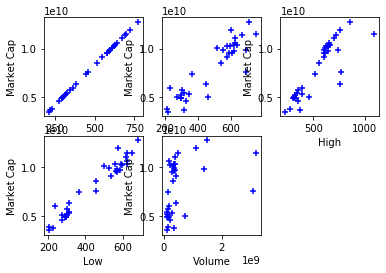

In [19]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(newdf.Open, newdf['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(newdf.Close, newdf['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(newdf.High, newdf['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(newdf.Low, newdf['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(newdf.Volume, newdf['Market Cap'],'Volume')

as we can see the Market Cap and Open have a linear relationship

In [20]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = newdf[['Open']]
Market_Cap  = newdf['Market Cap']

In [21]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Model Score
model.score(Open, Market_Cap)

0.9999801609861945

In [23]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
open = df[['Open']]
market_cap_predict = model.predict(open) 
df['Market Cap Predict'] = market_cap_predict.astype('int64')
df[df['Market Cap'].isnull()].head()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
35,2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN,4859285818
36,2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN,5716421715
37,2017-07-30,385.14,385.14,316.25,345.66,606695,NaN,6358611246
38,2017-07-29,410.56,423.73,323.73,384.77,737815,NaN,6779561681
39,2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN,6383616563


#### 4. Data Visualization

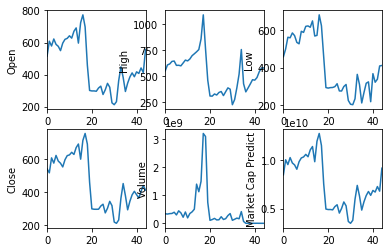

In [24]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap Predict'].plot()